In [1]:
import sys
sys.path.append("..")

import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from spiralcutter_advanced.libs.spiral_funcs import *
from spiralcutter_advanced.libs.profile_funcs import *
from spiralcutter_advanced.libs.helper_funcs import *
from scipy.optimize import curve_fit
from astropy.io import fits

# q = 0.1 spirals

/tmp/ipykernel_2705/119121815.py:85: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_2705/119121815.py:150: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


median w1 Savchenko20:
0.117
median w_avg Savchenko
0.13
median zpc (long)
0.19154190824062536
median zpc (all)
0.3526503302387264

median w0 (long)
0.29629935310109795
median w0 (all)
0.2809640938441436

median w/r at middle (long)
0.3705389058673791
median w/r at middle (all)
0.3564671378213431


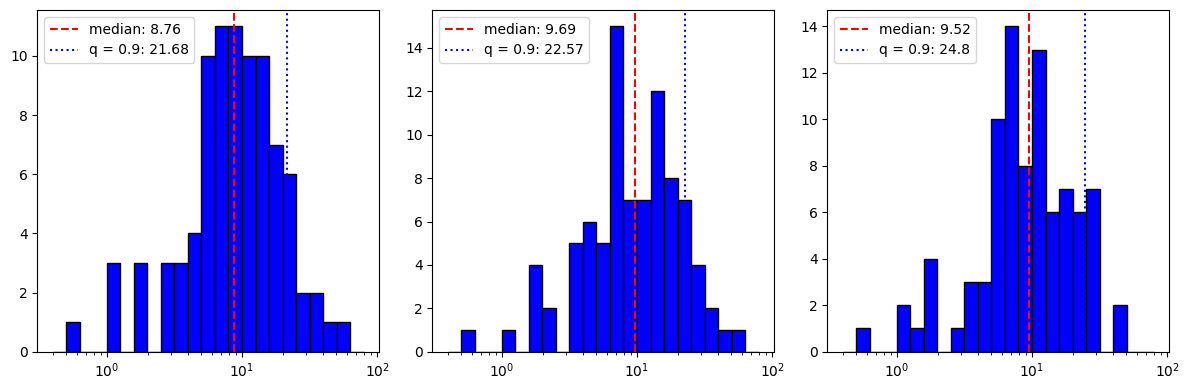

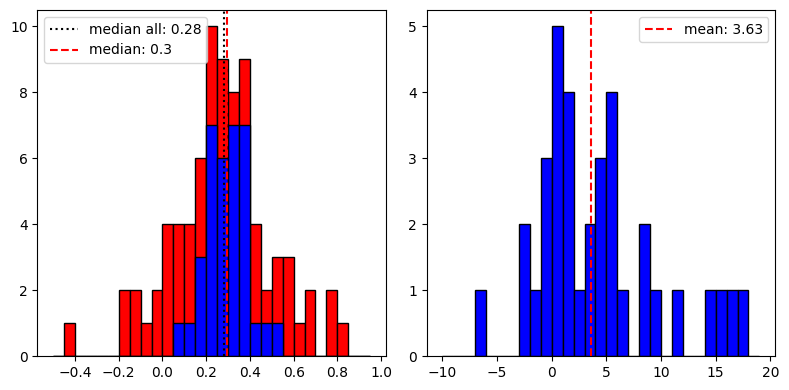

In [12]:
gals = []
gal_paths = glob.glob("../galaxies_images/*")
for path in gal_paths:
    gals.append(path.split("/")[-1])
gals = np.sort(gals)

gal_list = []
col_list = []
names_list = []
chisqs_list = []
params_list = []
n_list = []
lpsi_list = []
rmin_list = []
rmax_list = []

for gal in gals:
    path_w = f"../galaxies_images/{gal}/spiral_params/widths_1d.dat"
    with open(path_w, "r") as file:
        for line in file:
            col, fname = line.split()[0:2]
            rmin = float(line.split()[-5])
            rmax = float(line.split()[-4])
            chisq = float(line.split()[-3])
            lpsi = float(line.split()[-2])
            n = int(line.split()[-1])
            
            params = line.split("[")[1].split("]")[0]
            params = np.array(params.split()).astype(float)
            #if np.isnan(params[0]):
            #    continue
            
            gal_list.append(gal)
            col_list.append(col)
            names_list.append(fname)
            chisqs_list.append(chisq)
            params_list.append(params)
            n_list.append(n)
            lpsi_list.append(lpsi)
            rmin_list.append(rmin)
            rmax_list.append(rmax)
            
gal_list = np.array(gal_list)
col_list = np.array(col_list)
names_list = np.array(names_list)
chisqs_list = np.array(chisqs_list)
params_list = np.array(params_list)
n_list = np.array(n_list)
lpsi_list = np.array(lpsi_list)
rmin_list = np.array(rmin_list)
rmax_list = np.array(rmax_list)

params_list = params_list * 2 * np.sqrt(2 * np.log(2))

fig, (ax1, ax2, ax3) = plt.subplots(figsize=[12,4], nrows = 1, ncols = 3)

bins = np.power(10, np.arange(-0.4, 2, 0.1))
#print(bins)

chisqs_rlin = chisqs_list[names_list == "r_linear"]
chisqs_philin = chisqs_list[names_list == "phi_linear"]
chisqs_phiexp = chisqs_list[names_list == "phi_exp"]

ax1.hist(chisqs_rlin, bins = bins, edgecolor="k", facecolor="b")
ax2.hist(chisqs_philin, bins = bins, edgecolor="k", facecolor="b")
ax3.hist(chisqs_phiexp, bins = bins, edgecolor="k", facecolor="b")

ax1.axvline(np.median(chisqs_rlin), ls = "--", c = "r", label = f"median: {np.round(np.median(chisqs_rlin), 2)}")
ax2.axvline(np.median(chisqs_philin), ls = "--", c = "r", label = f"median: {np.round(np.median(chisqs_philin), 2)}")
ax3.axvline(np.median(chisqs_phiexp), ls = "--", c = "r", label = f"median: {np.round(np.median(chisqs_phiexp), 2)}")

ax1.axvline(np.quantile(chisqs_rlin, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.quantile(chisqs_rlin, 0.9), 2)}")
ax2.axvline(np.quantile(chisqs_philin, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.quantile(chisqs_philin, 0.9), 2)}")
ax3.axvline(np.quantile(chisqs_phiexp, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.quantile(chisqs_phiexp, 0.9), 2)}")

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")

fig.tight_layout()
fig.show()

lin_pars = params_list[names_list == "r_linear"]
#lin_pars_long = params_list[(names_list == "r_linear") * (lpsi_list >= 180)]

long_spirals = (lpsi_list[::3] >= 180)


r_avg = (rmin + rmax) / 2
w_avg = r_avg * lin_pars[:, 0] + lin_pars[:, 1] #w0, w1
wr_avg = w_avg / r_avg

#print(lin_pars[:, 0])
#print(lin_pars_long[:, 0])

Savchenko20 = np.genfromtxt('../../COSMOS_spirals_decomp/other/Savchenko+20_arms.txt', skip_header=13, usecols = np.arange(1, 8))
print("median w1 Savchenko20:")
print(np.nanmedian(Savchenko20[:, 3]))
print("median w_avg Savchenko")
print(np.nanmedian(Savchenko20[:, 2]))

#print(np.mean(np.abs(lin_pars_long[:, 1])))
#print(np.mean(w_min[lpsi_list[::3] >= 180]))

#print()

zp_contrib = np.abs(lin_pars[:, 1]) / (w_avg)

print("median zpc (long)")
print(np.median(zp_contrib[long_spirals]))
print("median zpc (all)")
print(np.median(zp_contrib))
print()
print("median w0 (long)")
print(np.median(lin_pars[long_spirals, 0]))
print("median w0 (all)")
print(np.median(lin_pars[:, 0]))
print()
print("median w/r at middle (long)")
print(np.median(wr_avg[long_spirals]))
print("median w/r at middle (all)")
print(np.median(wr_avg))

#print()

#print(np.sum(lin_pars[:, 0] >= 0) / len(lin_pars[:, 0]))


fig, (ax1, ax2) = plt.subplots(figsize=[8,4], ncols = 2)

ax1.hist(lin_pars[:, 0], np.arange(-0.5, 1, 0.05), edgecolor="k", facecolor="r")
ax1.hist(lin_pars_long[:, 0], np.arange(-0.5, 1, 0.05), edgecolor="k", facecolor="b")
ax2.hist(lin_pars_long[:, 1], np.arange(-10, 20, 1), edgecolor="k", facecolor="b")

ax1.axvline(np.median(lin_pars[:, 0]), ls = ":", c = "k",
            label = f"median all: {np.round(np.median(lin_pars[:, 0]), 2)}")
ax1.axvline(np.median(lin_pars_long[:, 0]), ls = "--", c = "r",
            label = f"median: {np.round(np.median(lin_pars_long[:, 0]), 2)}")
ax2.axvline(np.median(lin_pars_long[:, 1]), ls = "--", c = "r",
            label = f"mean: {np.round(np.median(lin_pars_long[:, 1]), 2)}")

ax1.legend()
ax2.legend()

fig.tight_layout()
fig.show()

# Masked spirals

/tmp/ipykernel_2705/3022192153.py:85: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_2705/3022192153.py:150: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


median w1 Savchenko20:
0.117
median w_avg Savchenko
0.13
median zpc (long)
0.33630742177947104
median zpc (all)
0.27534221144705767

median w0 (long)
0.19222652702972548
median w0 (all)
0.19884424247997529

median w/r at middle (long)
0.2923065613929053
median w/r at middle (all)
0.27129546966768303


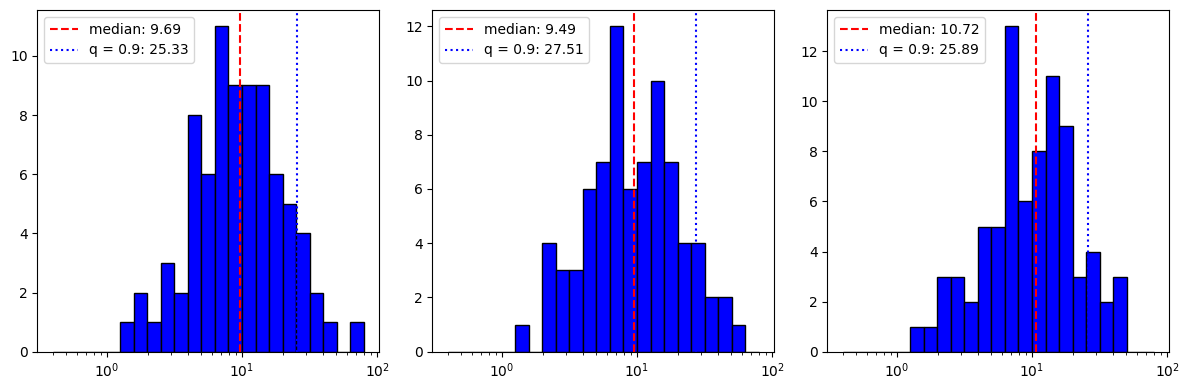

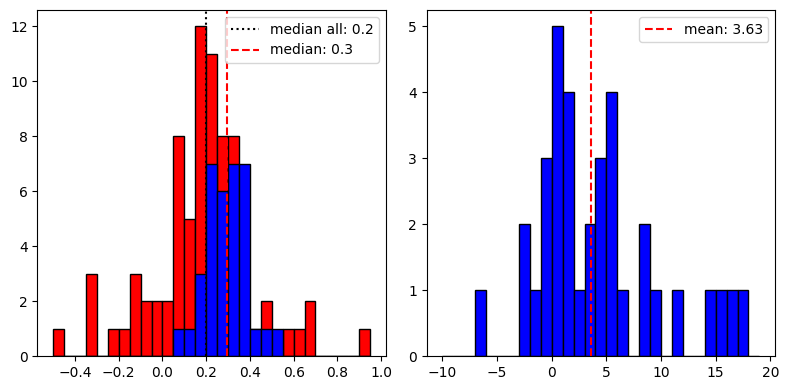

In [13]:
gals = []
gal_paths = glob.glob("../galaxies_images/*")
for path in gal_paths:
    gals.append(path.split("/")[-1])
gals = np.sort(gals)

gal_list = []
col_list = []
names_list = []
chisqs_list = []
params_list = []
n_list = []
lpsi_list = []
rmin_list = []
rmax_list = []

for gal in gals:
    path_w = f"../galaxies_images/{gal}/spiral_params/widths_1d_masked.dat"
    with open(path_w, "r") as file:
        for line in file:
            col, fname = line.split()[0:2]
            rmin = float(line.split()[-5])
            rmax = float(line.split()[-4])
            chisq = float(line.split()[-3])
            lpsi = float(line.split()[-2])
            n = int(line.split()[-1])
            
            params = line.split("[")[1].split("]")[0]
            params = np.array(params.split()).astype(float)
            #if np.isnan(params[0]):
            #    continue
            
            gal_list.append(gal)
            col_list.append(col)
            names_list.append(fname)
            chisqs_list.append(chisq)
            params_list.append(params)
            n_list.append(n)
            lpsi_list.append(lpsi)
            rmin_list.append(rmin)
            rmax_list.append(rmax)
            
gal_list = np.array(gal_list)
col_list = np.array(col_list)
names_list = np.array(names_list)
chisqs_list = np.array(chisqs_list)
params_list = np.array(params_list)
n_list = np.array(n_list)
lpsi_list = np.array(lpsi_list)
rmin_list = np.array(rmin_list)
rmax_list = np.array(rmax_list)

params_list = params_list * 2 * np.sqrt(2 * np.log(2))

fig, (ax1, ax2, ax3) = plt.subplots(figsize=[12,4], nrows = 1, ncols = 3)

bins = np.power(10, np.arange(-0.4, 2, 0.1))
#print(bins)

chisqs_rlin = chisqs_list[names_list == "r_linear"]
chisqs_philin = chisqs_list[names_list == "phi_linear"]
chisqs_phiexp = chisqs_list[names_list == "phi_exp"]

ax1.hist(chisqs_rlin, bins = bins, edgecolor="k", facecolor="b")
ax2.hist(chisqs_philin, bins = bins, edgecolor="k", facecolor="b")
ax3.hist(chisqs_phiexp, bins = bins, edgecolor="k", facecolor="b")

ax1.axvline(np.nanmedian(chisqs_rlin), ls = "--", c = "r", label = f"median: {np.round(np.nanmedian(chisqs_rlin), 2)}")
ax2.axvline(np.nanmedian(chisqs_philin), ls = "--", c = "r", label = f"median: {np.round(np.nanmedian(chisqs_philin), 2)}")
ax3.axvline(np.nanmedian(chisqs_phiexp), ls = "--", c = "r", label = f"median: {np.round(np.nanmedian(chisqs_phiexp), 2)}")

ax1.axvline(np.nanquantile(chisqs_rlin, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.nanquantile(chisqs_rlin, 0.9), 2)}")
ax2.axvline(np.nanquantile(chisqs_philin, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.nanquantile(chisqs_philin, 0.9), 2)}")
ax3.axvline(np.nanquantile(chisqs_phiexp, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.nanquantile(chisqs_phiexp, 0.9), 2)}")

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")

fig.tight_layout()
fig.show()

lin_pars = params_list[names_list == "r_linear"]
#lin_pars_long = params_list[(names_list == "r_linear") * (lpsi_list >= 180)]

long_spirals = (lpsi_list[::3] >= 180)


r_avg = (rmin + rmax) / 2
w_avg = r_avg * lin_pars[:, 0] + lin_pars[:, 1] #w0, w1
wr_avg = w_avg / r_avg

#print(lin_pars[:, 0])
#print(lin_pars_long[:, 0])

Savchenko20 = np.genfromtxt('../../COSMOS_spirals_decomp/other/Savchenko+20_arms.txt', skip_header=13, usecols = np.arange(1, 8))
print("median w1 Savchenko20:")
print(np.nanmedian(Savchenko20[:, 3]))
print("median w_avg Savchenko")
print(np.nanmedian(Savchenko20[:, 2]))

#print(np.mean(np.abs(lin_pars_long[:, 1])))
#print(np.mean(w_min[lpsi_list[::3] >= 180]))

#print()

zp_contrib = np.abs(lin_pars[:, 1]) / (w_avg)

print("median zpc (long)")
print(np.median(zp_contrib[long_spirals]))
print("median zpc (all)")
print(np.median(zp_contrib))
print()
print("median w0 (long)")
print(np.median(lin_pars[long_spirals, 0]))
print("median w0 (all)")
print(np.median(lin_pars[:, 0]))
print()
print("median w/r at middle (long)")
print(np.median(wr_avg[long_spirals]))
print("median w/r at middle (all)")
print(np.median(wr_avg))

#print()

#print(np.sum(lin_pars[:, 0] >= 0) / len(lin_pars[:, 0]))


fig, (ax1, ax2) = plt.subplots(figsize=[8,4], ncols = 2)

ax1.hist(lin_pars[:, 0], np.arange(-0.5, 1, 0.05), edgecolor="k", facecolor="r")
ax1.hist(lin_pars_long[:, 0], np.arange(-0.5, 1, 0.05), edgecolor="k", facecolor="b")
ax2.hist(lin_pars_long[:, 1], np.arange(-10, 20, 1), edgecolor="k", facecolor="b")

ax1.axvline(np.median(lin_pars[:, 0]), ls = ":", c = "k",
            label = f"median all: {np.round(np.median(lin_pars[:, 0]), 2)}")
ax1.axvline(np.median(lin_pars_long[:, 0]), ls = "--", c = "r",
            label = f"median: {np.round(np.median(lin_pars_long[:, 0]), 2)}")
ax2.axvline(np.median(lin_pars_long[:, 1]), ls = "--", c = "r",
            label = f"mean: {np.round(np.median(lin_pars_long[:, 1]), 2)}")

ax1.legend()
ax2.legend()

fig.tight_layout()
fig.show()

# uv spirals

/tmp/ipykernel_2705/125125440.py:87: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_2705/125125440.py:152: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


median w1 Savchenko20:
0.117
median w_avg Savchenko
0.13
median zpc (long)
0.3853421147597589
median zpc (all)
0.6115850003662486

median w0 (long)
0.14251535749930458
median w0 (all)
0.13757541600883866

median w/r at middle (long)
0.27596302376645604
median w/r at middle (all)
0.3044025798412714


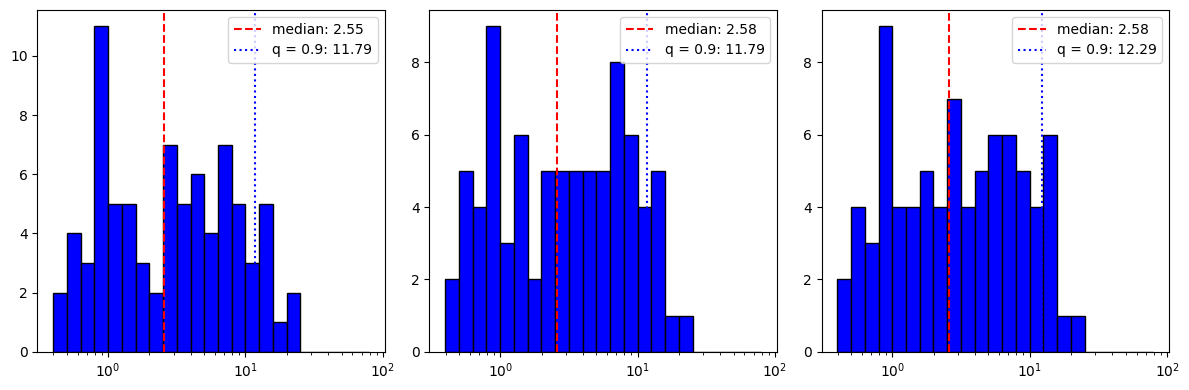

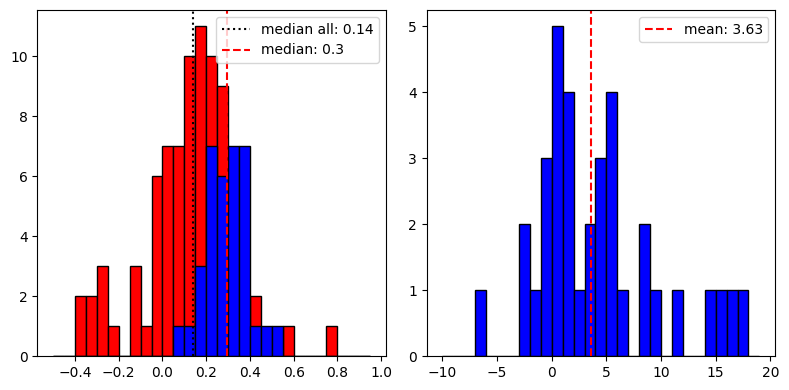

In [14]:
gals = []
gal_paths = glob.glob("../gals_uv/*")
for path in gal_paths:
    gals.append(path.split("/")[-1])
gals = np.sort(gals)

gal_list = []
col_list = []
names_list = []
chisqs_list = []
params_list = []
n_list = []
lpsi_list = []
rmin_list = []
rmax_list = []

for gal in gals:
    path_w = f"../gals_uv/{gal}/spiral_params/widths_1d.dat"
    with open(path_w, "r") as file:
        for line in file:
            col, fname = line.split()[0:2]
            rmin = float(line.split()[-5])
            rmax = float(line.split()[-4])
            chisq = float(line.split()[-3])
            lpsi = float(line.split()[-2])
            n = int(line.split()[-1])
            
            params = line.split("[")[1].split("]")[0]
            params = np.array(params.split()).astype(float)
            #if np.isnan(params[0]):
            #    continue
            
            gal_list.append(gal)
            col_list.append(col)
            names_list.append(fname)
            chisqs_list.append(chisq)
            params_list.append(params)
            n_list.append(n)
            lpsi_list.append(lpsi)
            rmin_list.append(rmin)
            rmax_list.append(rmax)
            
#print(params_list)
            
gal_list = np.array(gal_list)
col_list = np.array(col_list)
names_list = np.array(names_list)
chisqs_list = np.array(chisqs_list)
params_list = np.array(params_list)
n_list = np.array(n_list)
lpsi_list = np.array(lpsi_list)
rmin_list = np.array(rmin_list)
rmax_list = np.array(rmax_list)

params_list = params_list * 2 * np.sqrt(2 * np.log(2))

fig, (ax1, ax2, ax3) = plt.subplots(figsize=[12,4], nrows = 1, ncols = 3)

bins = np.power(10, np.arange(-0.4, 2, 0.1))
#print(bins)

chisqs_rlin = chisqs_list[names_list == "r_linear"]
chisqs_philin = chisqs_list[names_list == "phi_linear"]
chisqs_phiexp = chisqs_list[names_list == "phi_exp"]

ax1.hist(chisqs_rlin, bins = bins, edgecolor="k", facecolor="b")
ax2.hist(chisqs_philin, bins = bins, edgecolor="k", facecolor="b")
ax3.hist(chisqs_phiexp, bins = bins, edgecolor="k", facecolor="b")

ax1.axvline(np.nanmedian(chisqs_rlin), ls = "--", c = "r", label = f"median: {np.round(np.nanmedian(chisqs_rlin), 2)}")
ax2.axvline(np.nanmedian(chisqs_philin), ls = "--", c = "r", label = f"median: {np.round(np.nanmedian(chisqs_philin), 2)}")
ax3.axvline(np.nanmedian(chisqs_phiexp), ls = "--", c = "r", label = f"median: {np.round(np.nanmedian(chisqs_phiexp), 2)}")

ax1.axvline(np.nanquantile(chisqs_rlin, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.nanquantile(chisqs_rlin, 0.9), 2)}")
ax2.axvline(np.nanquantile(chisqs_philin, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.nanquantile(chisqs_philin, 0.9), 2)}")
ax3.axvline(np.nanquantile(chisqs_phiexp, 0.9), ls = ":", c = "b", label = f"q = 0.9: {np.round(np.nanquantile(chisqs_phiexp, 0.9), 2)}")

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")

fig.tight_layout()
fig.show()

lin_pars = params_list[names_list == "r_linear"]
#lin_pars_long = params_list[(names_list == "r_linear") * (lpsi_list >= 180)]

long_spirals = (lpsi_list[::3] >= 180)


r_avg = (rmin + rmax) / 2
w_avg = r_avg * lin_pars[:, 0] + lin_pars[:, 1] #w0, w1
wr_avg = w_avg / r_avg

#print(lin_pars[:, 0])
#print(lin_pars_long[:, 0])

Savchenko20 = np.genfromtxt('../../COSMOS_spirals_decomp/other/Savchenko+20_arms.txt', skip_header=13, usecols = np.arange(1, 8))
print("median w1 Savchenko20:")
print(np.nanmedian(Savchenko20[:, 3]))
print("median w_avg Savchenko")
print(np.nanmedian(Savchenko20[:, 2]))

#print(np.mean(np.abs(lin_pars_long[:, 1])))
#print(np.mean(w_min[lpsi_list[::3] >= 180]))

#print()

zp_contrib = np.abs(lin_pars[:, 1]) / (w_avg)

print("median zpc (long)")
print(np.median(zp_contrib[long_spirals]))
print("median zpc (all)")
print(np.median(zp_contrib))
print()
print("median w0 (long)")
print(np.median(lin_pars[long_spirals, 0]))
print("median w0 (all)")
print(np.median(lin_pars[:, 0]))
print()
print("median w/r at middle (long)")
print(np.median(wr_avg[long_spirals]))
print("median w/r at middle (all)")
print(np.median(wr_avg))

#print()

#print(np.sum(lin_pars[:, 0] >= 0) / len(lin_pars[:, 0]))


fig, (ax1, ax2) = plt.subplots(figsize=[8,4], ncols = 2)

ax1.hist(lin_pars[:, 0], np.arange(-0.5, 1, 0.05), edgecolor="k", facecolor="r")
ax1.hist(lin_pars_long[:, 0], np.arange(-0.5, 1, 0.05), edgecolor="k", facecolor="b")
ax2.hist(lin_pars_long[:, 1], np.arange(-10, 20, 1), edgecolor="k", facecolor="b")

ax1.axvline(np.median(lin_pars[:, 0]), ls = ":", c = "k",
            label = f"median all: {np.round(np.median(lin_pars[:, 0]), 2)}")
ax1.axvline(np.median(lin_pars_long[:, 0]), ls = "--", c = "r",
            label = f"median: {np.round(np.median(lin_pars_long[:, 0]), 2)}")
ax2.axvline(np.median(lin_pars_long[:, 1]), ls = "--", c = "r",
            label = f"mean: {np.round(np.median(lin_pars_long[:, 1]), 2)}")

ax1.legend()
ax2.legend()

fig.tight_layout()
fig.show()